<h1><center>The prediction models for the premierleague</center></h1>

<h4><center>(시즌12-16의 경기 정보를 통해 시즌17 경기 결과를 예측)<center><h4>

---

<img src='img/premierleague.jpeg'>

---

## Contents

- EDA
- Feature Select
- Modeling
- Evaluation

---

In [48]:
# Setting
from function import * # import function
train = pd.read_csv('data/train.csv') # import train data
test = pd.read_csv('data/test.csv') # import test data

## 1. EDA

#### 1.1 Overall information

In [2]:
# check shape
print('train shape :', train.shape) # 12 - 16 season
print('test shape :', test.shape) # 17 season

train shape : (3800, 14)
test shape : (760, 14)


In [3]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 14 columns):
Team          3800 non-null object
Possession    3800 non-null float64
SOT           3800 non-null int64
Shots         3800 non-null int64
Touches       3800 non-null int64
Passes        3800 non-null int64
Tackles       3800 non-null int64
Clearances    3800 non-null int64
Corners       3800 non-null int64
Offsides      3800 non-null int64
Goal          3800 non-null int64
Year          3800 non-null int64
Home          3800 non-null int64
Result        3800 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 415.7+ KB


#### Note :

- Team(팀명)외에는 모두 숫자형으로 구성

In [4]:
# Check null
train.isnull().any()

Team          False
Possession    False
SOT           False
Shots         False
Touches       False
Passes        False
Tackles       False
Clearances    False
Corners       False
Offsides      False
Goal          False
Year          False
Home          False
Result        False
dtype: bool

#### Note :

- Null값은 없는 것으로 확인

#### 1.2 Y data

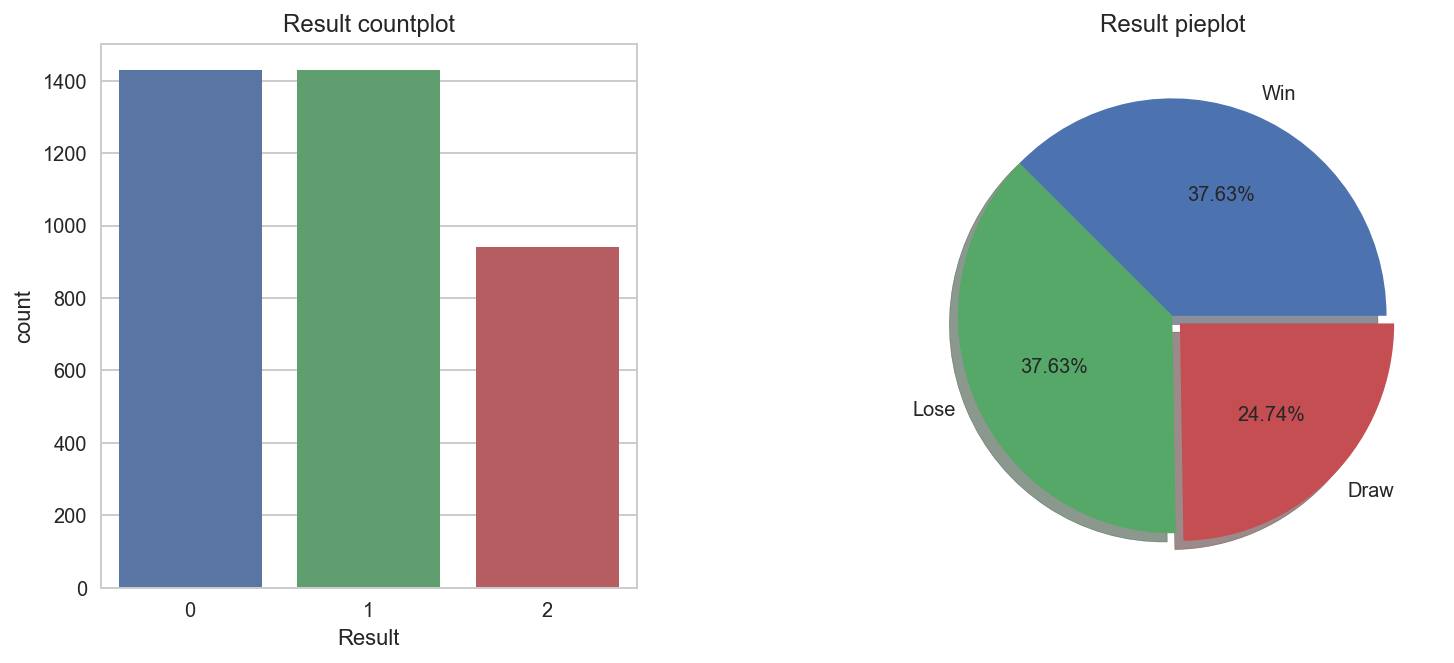

Lose : 1430번 0.38
Win : 1430번 0.38
Draw : 940번 0.25


In [5]:
# y_data
plt.figure(figsize=(12, 5))
subplots_adjust(wspace = 0.5)
df = pd.DataFrame([len(train[train['Result'] == 0])/len(train), 
                   len(train[train['Result'] == 1])/len(train), 
                   len(train[train['Result'] == 2])/len(train)], 
                   index=['Lose', 'Win', 'Draw'], columns=['x'])

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x = 'Result', data = train)
plt.title('Result countplot')
labels = 'Win', 'Lose', 'Draw'

# pieplot
plt.subplot(1, 2, 2)
plt.pie(df, labels = labels, autopct='%1.2f%%', shadow = True, explode = (0.0, 0.0, 0.05))
plt.title('Result pieplot')

plt.show()

print('Lose : {}번'.format(len(train[train['Result'] == 0])), round(len(train[train['Result'] == 0])/len(train), 2))
print('Win : {}번'.format(len(train[train['Result'] == 1])), round(len(train[train['Result'] == 1])/len(train), 2))
print('Draw : {}번'.format(len(train[train['Result'] == 2])), round(len(train[train['Result'] == 2])/len(train), 2))

#### Note :

1. Lose/Win은 횟수가 같다는 것을 확인 (누군가가 이긴경기는 누군가는 졌으니까)
2. Draw(무승부)의 비율이 작다는 것을 확인

#### 1.3 Y data & X data

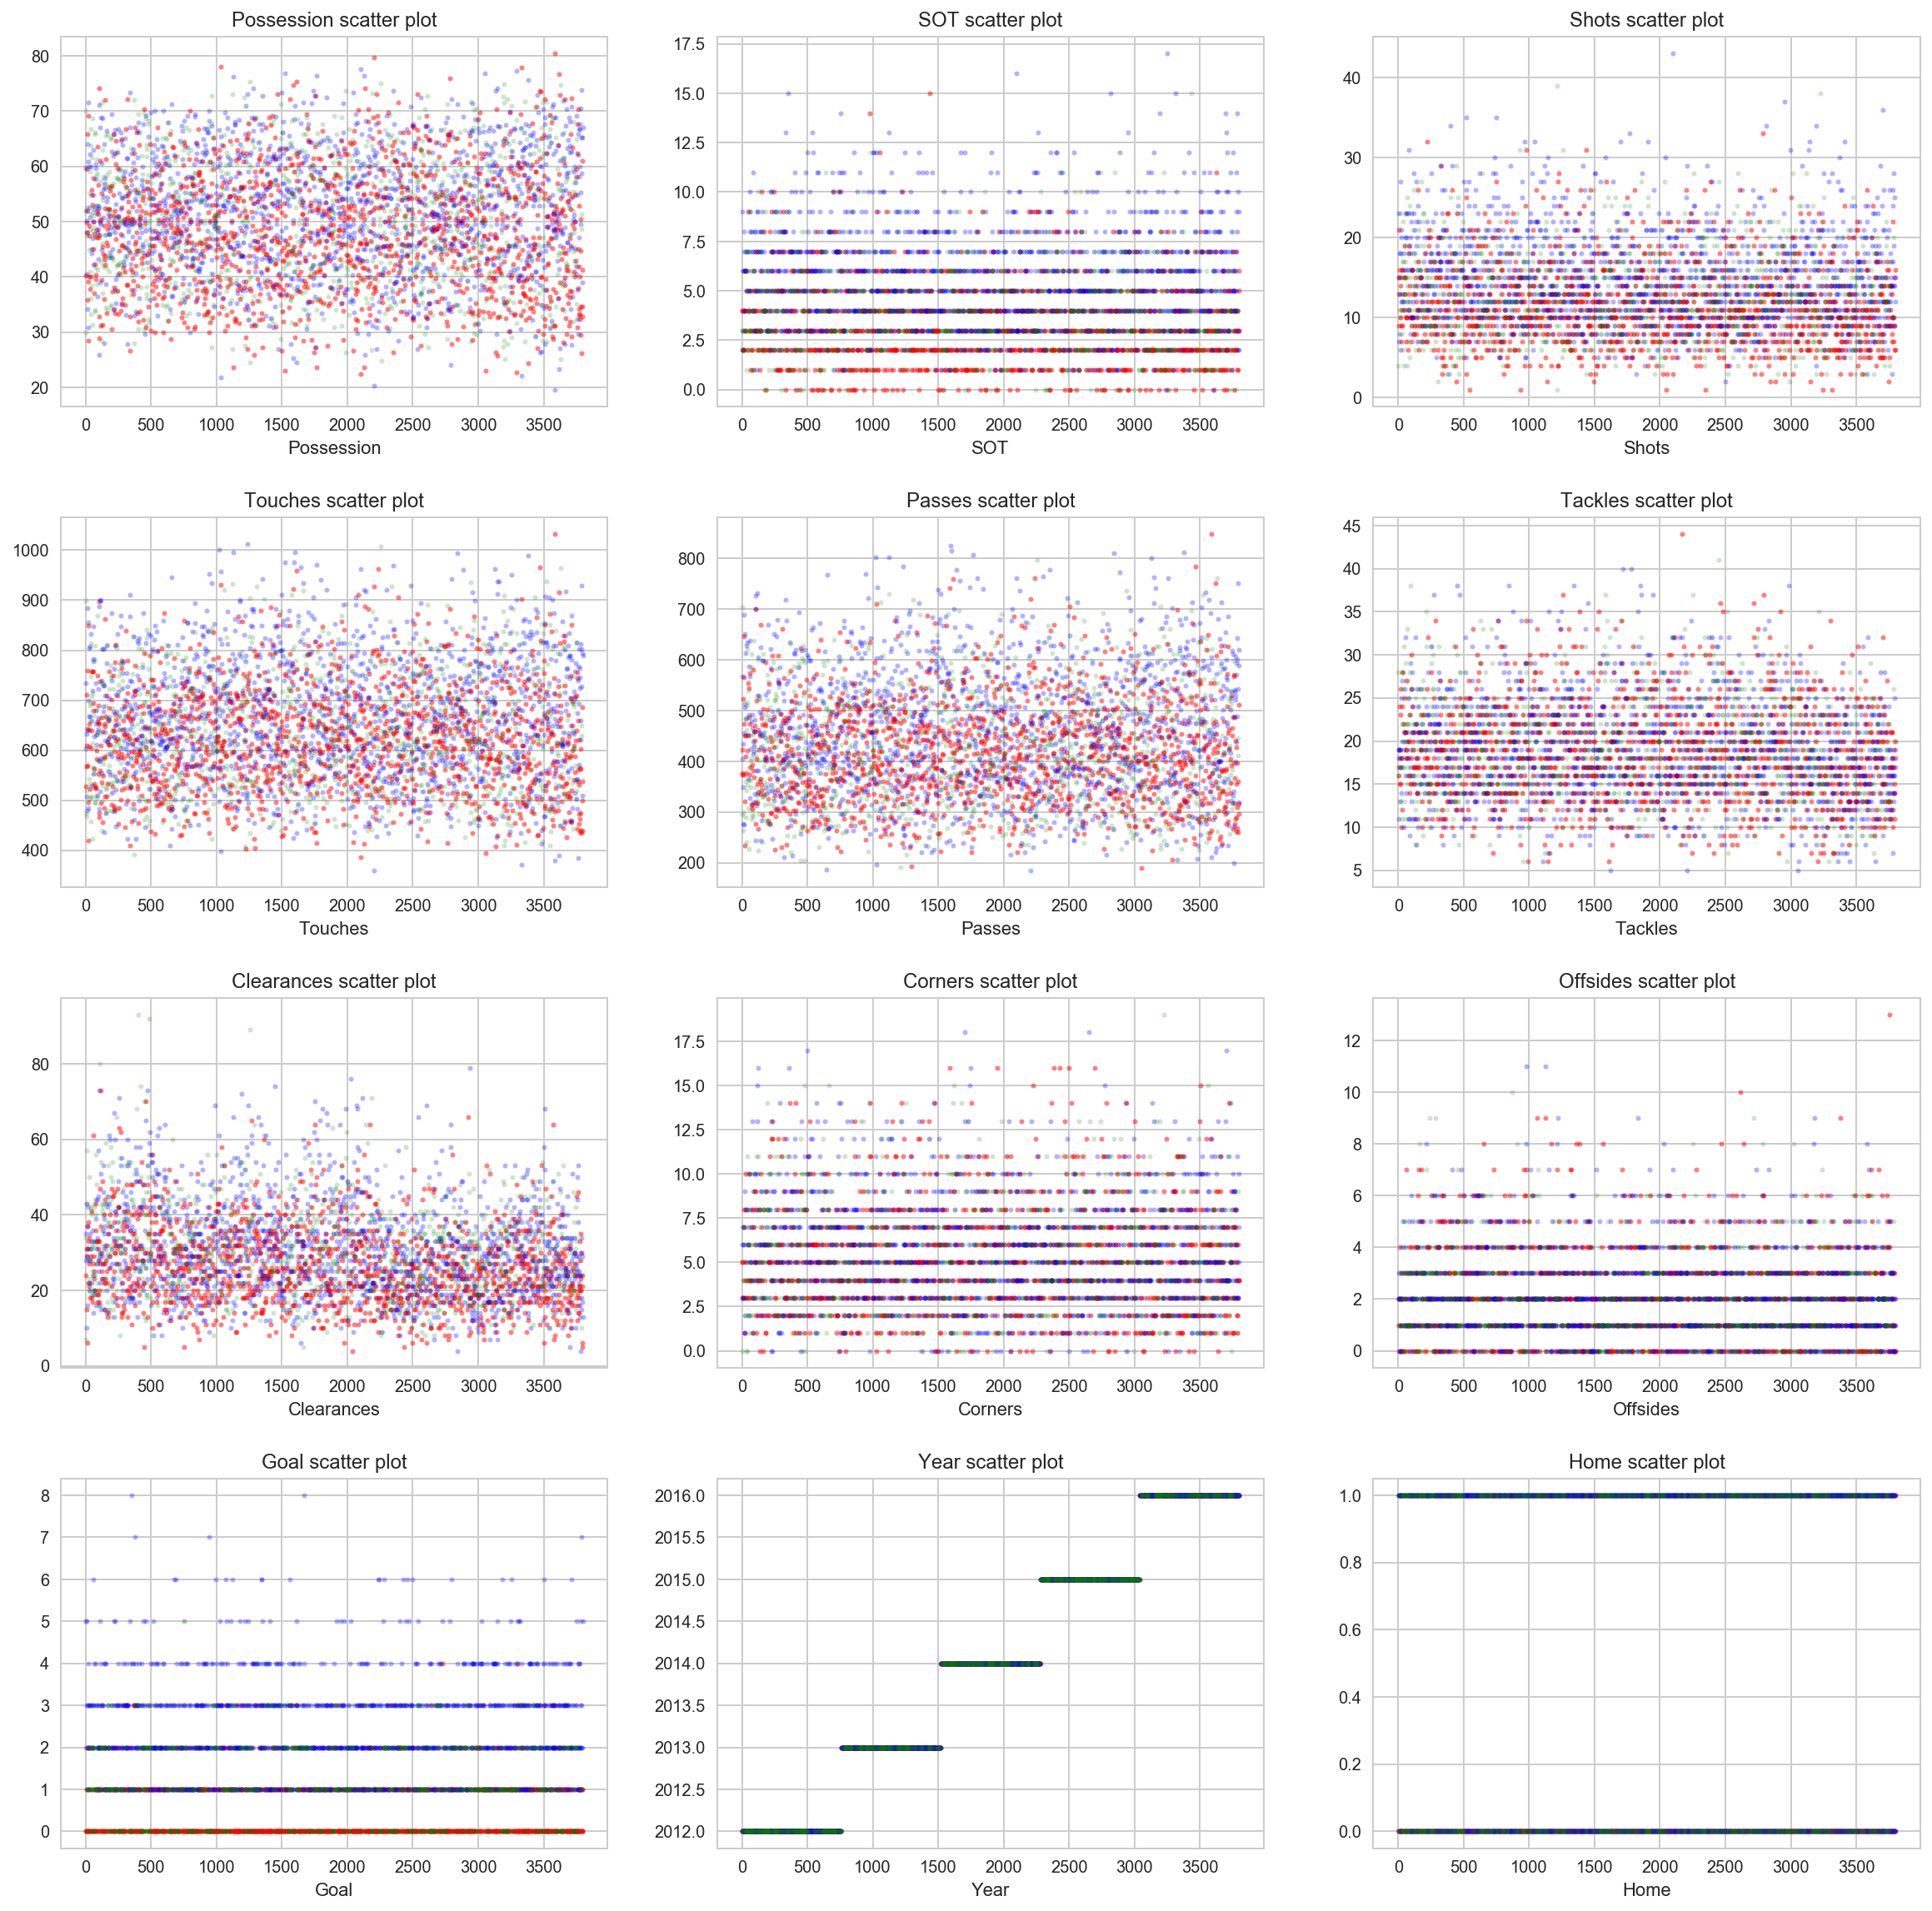

In [6]:
# scatter plot
result0 = train[train['Result'] == 0]
result1 = train[train['Result'] == 1]
result2 = train[train['Result'] == 2]

# feature scatter plot
plt.figure(figsize=(20, 20))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    plt.plot(result0[result0.columns[i]], 'ro', alpha = 0.5, markersize = 3)
    plt.plot(result1[result1.columns[i]], 'bo', alpha = 0.3, markersize = 3)
    plt.plot(result2[result2.columns[i]], 'go', alpha = 0.2, markersize = 3)
    plt.title('{} scatter plot'.format(result0.columns[i]))
    plt.xlabel(result0.columns[i])

#### Note :

1. 전체적으로 하나의 변수로 Y값을 구분할 수 있는 데이터가 없어보임
2. 그나마 Goal은 Y값을 어느정도 구분할 수 있는 데이터라 판단됨
3. Year는 Y값과 상관성이 없어보임

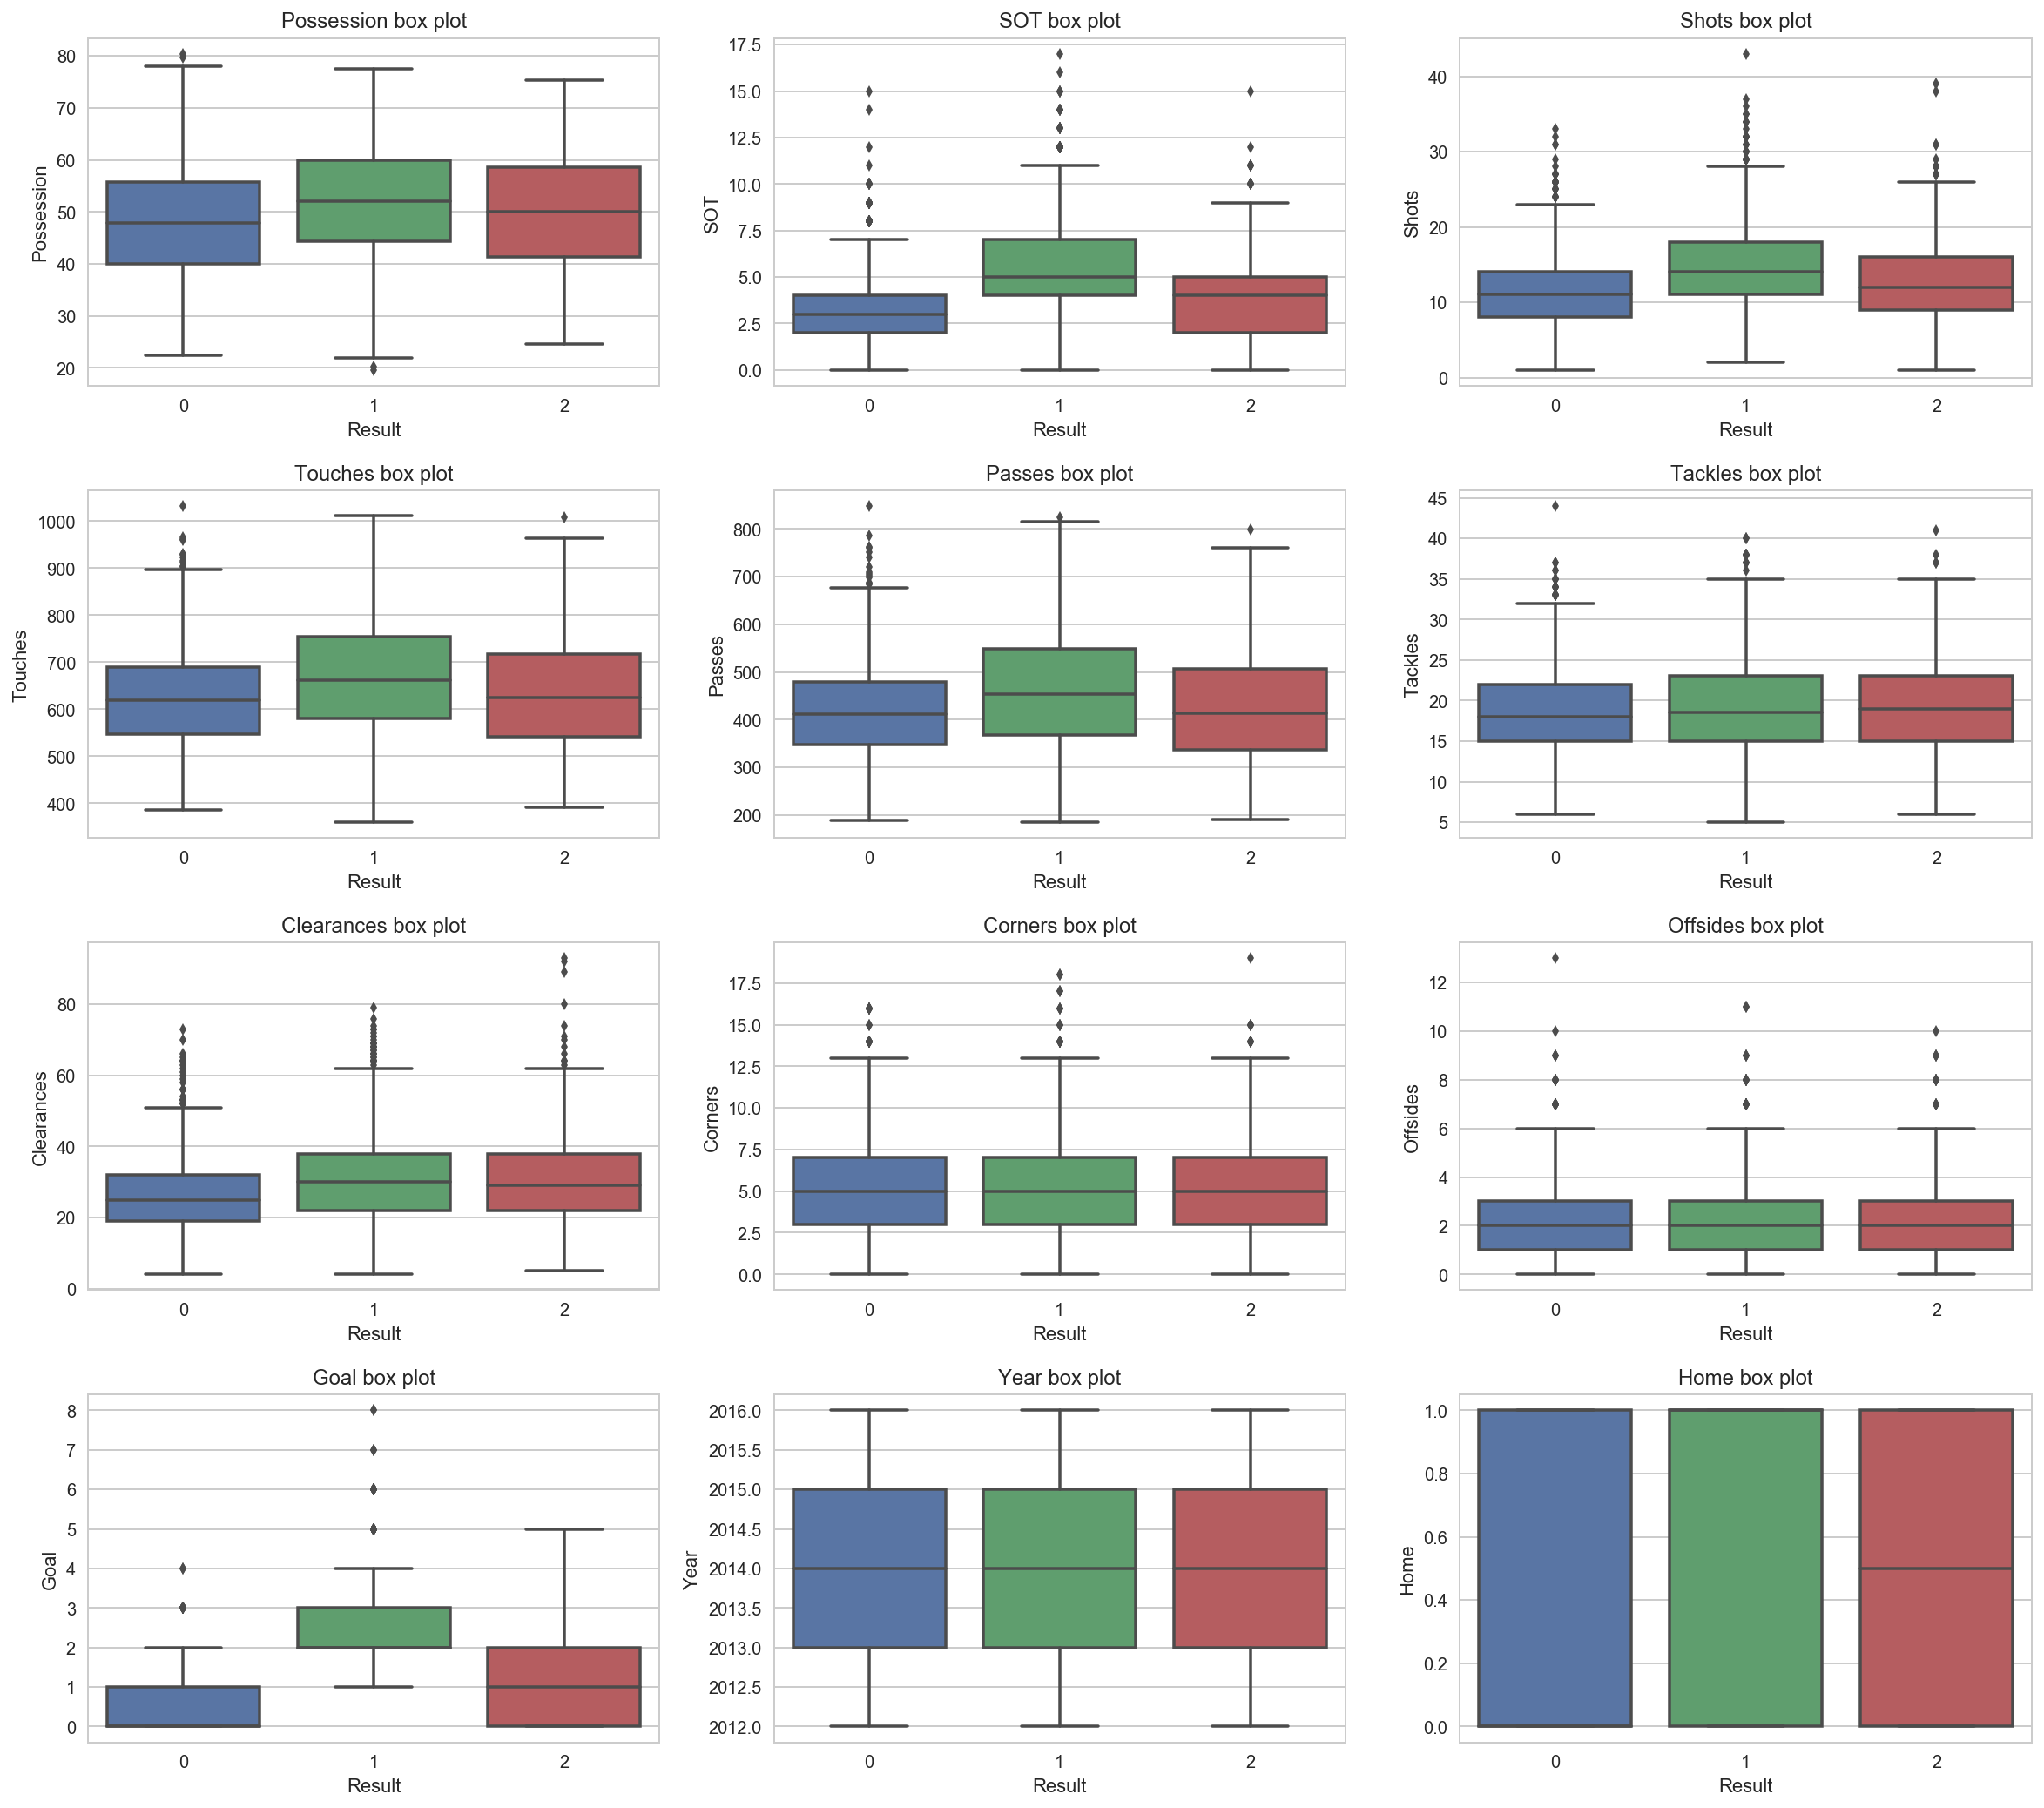

In [7]:
# feature boxplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 12+1) :
    plt.subplot(4, 3, i)
    sns.boxplot(x = train['Result'], y = train[train.columns[i]], data = train)
    plt.title('{} box plot'.format(train.columns[i]))

#### Note :
1. Boxplot을 통해 각 클래스별 특징을 확인
2. Win일수록 SOT(유효슈팅), Touches, Passes, Goal의 평균치가 높다는 것을 확인
3. Lose일수록 Win가 반대 경향을 띄는데 Draw와 구분이 안되는 변수도 있음

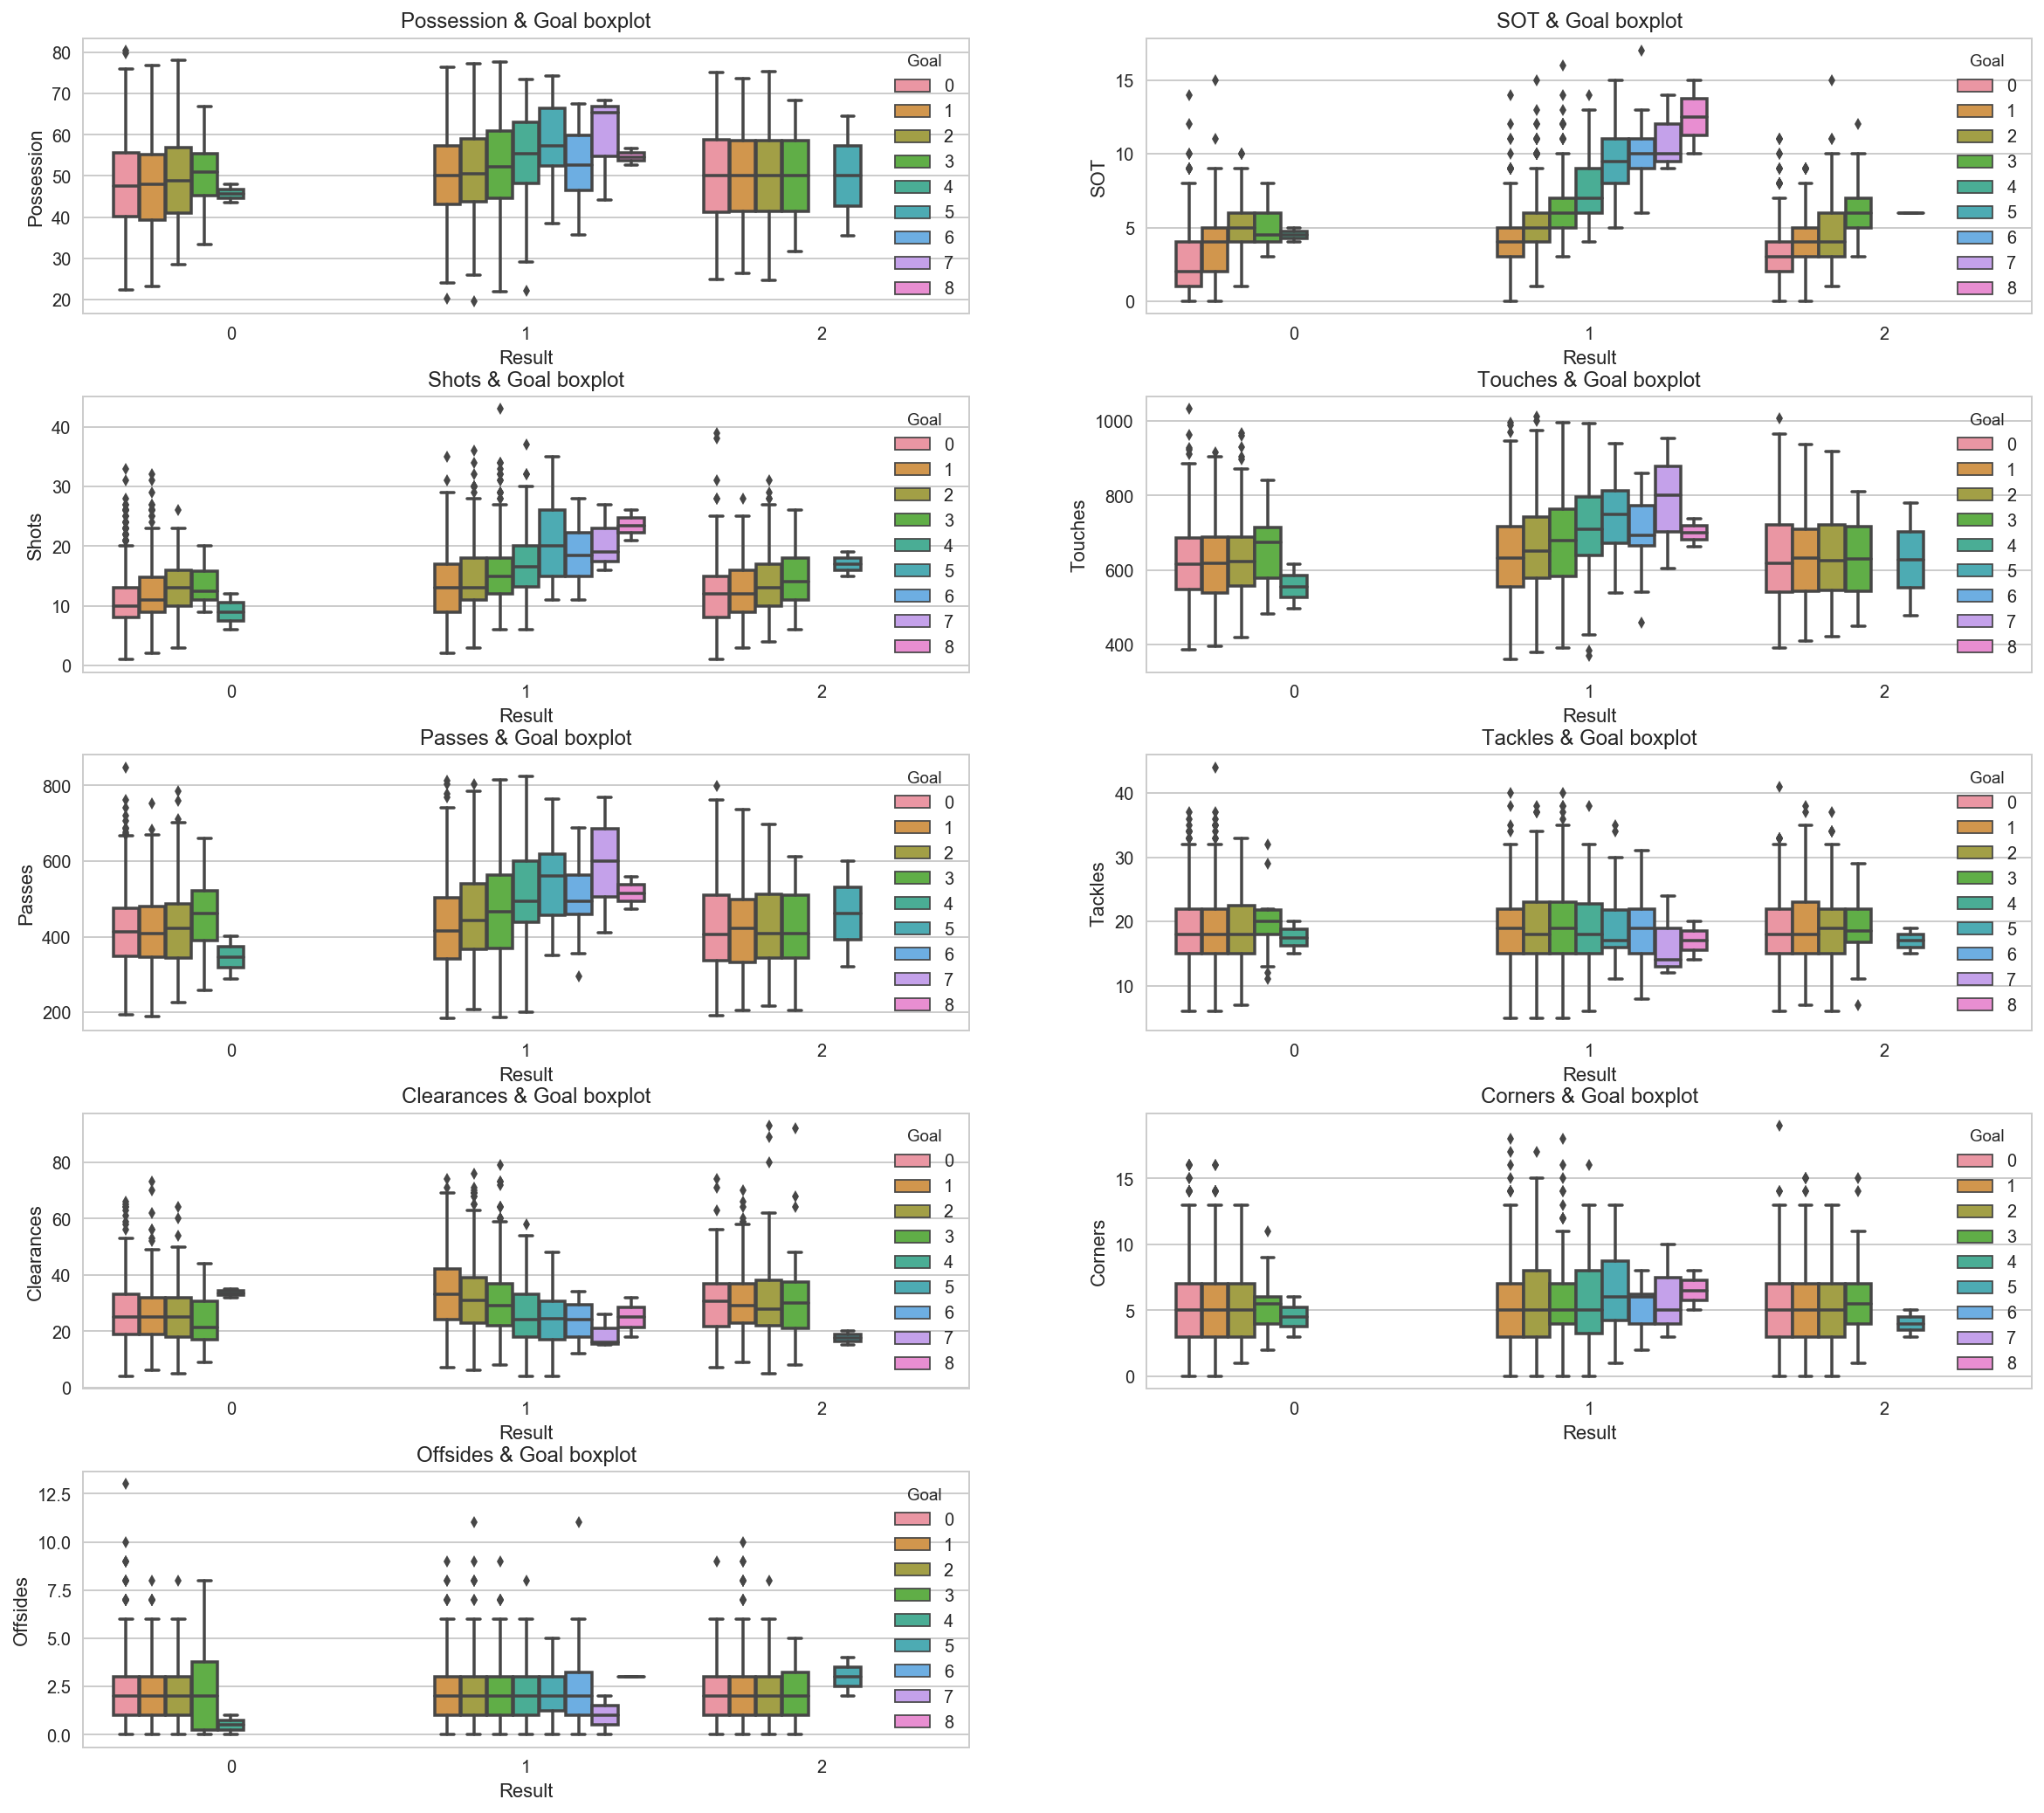

In [8]:
# detail boxplot
plt.figure(figsize=(20, 18))
subplots_adjust(hspace = 0.3)

for i in range(1, 9+1) :
    plt.subplot(5, 2, i)
    sns.boxplot(x = train['Result'], y = train[train.columns[i]], hue = 'Goal', data = train)
    plt.title('{} & Goal boxplot'.format(train.columns[i]))

#### Note :

- Goal, Result별 득점 분포를 나머지 변수와 비교
- 이기면서 득점이 많을수록 Shots, Passes, SOT, Touches등이 많이 발생함

In [9]:
# groupby Goal
train.groupby('Goal').mean()

,Possession,SOT,Shots,Touches,Passes,Tackles,Clearances,Corners,Offsides,Year,Home,Result
Goal,,,,,,,,,,,,
0,48.643041,2.872811,11.277419,624.939171,420.082949,18.611060,27.625806,5.105069,2.077419,2014.010138,0.411060,0.560369
1,49.235025,3.924714,12.741408,630.456628,422.230769,18.838789,29.642390,5.445172,2.106383,2014.009002,0.486907,0.885434
2,50.649821,5.089392,14.163290,652.170441,443.822408,19.059595,31.072706,5.475566,2.112038,2013.960667,0.554231,1.129917
3,51.675058,6.110855,15.200924,670.953811,463.066975,19.334873,30.369515,5.565820,2.198614,2013.993072,0.572748,1.041570
4,54.780128,7.487179,16.788462,706.615385,508.980769,18.705128,25.564103,5.634615,2.237179,2014.147436,0.641026,0.987179
5,57.422500,9.300000,20.350000,737.575000,539.525000,18.875000,23.525000,6.250000,2.250000,2013.825000,0.675000,1.050000
6,52.850000,10.050000,18.600000,698.500000,502.550000,19.000000,23.900000,5.400000,2.650000,2014.050000,0.750000,1.000000
7,59.266667,11.000000,20.666667,786.333333,593.333333,16.666667,19.000000,6.000000,1.000000,2013.666667,0.666667,1.000000
8,54.600000,12.500000,23.500000,699.500000,515.500000,17.000000,25.000000,6.500000,3.000000,2013.000000,1.000000,1.000000


In [10]:
# groupby Result
train.groupby('Result').mean()

,Possession,SOT,Shots,Touches,Passes,Tackles,Clearances,Corners,Offsides,Goal,Year,Home
Result,,,,,,,,,,,,
0,48.21049,3.332168,11.613287,622.753846,419.338462,18.664336,26.413287,5.116783,2.083916,0.569231,2014.013287,0.397902
1,51.78951,5.686713,15.025175,668.597902,460.858741,18.975524,31.094406,5.633566,2.179720,2.390210,2014.013287,0.602098
2,50.00000,3.969149,12.863830,635.107447,425.311702,19.030851,30.526596,5.417021,2.080851,1.008511,2013.959574,0.500000


#### Note :

1. Tackels, Offsides의 경우 Result에 따른 구분이 힘듦
2. 홈일수록 이기는 경우가 많다는 것을 확인

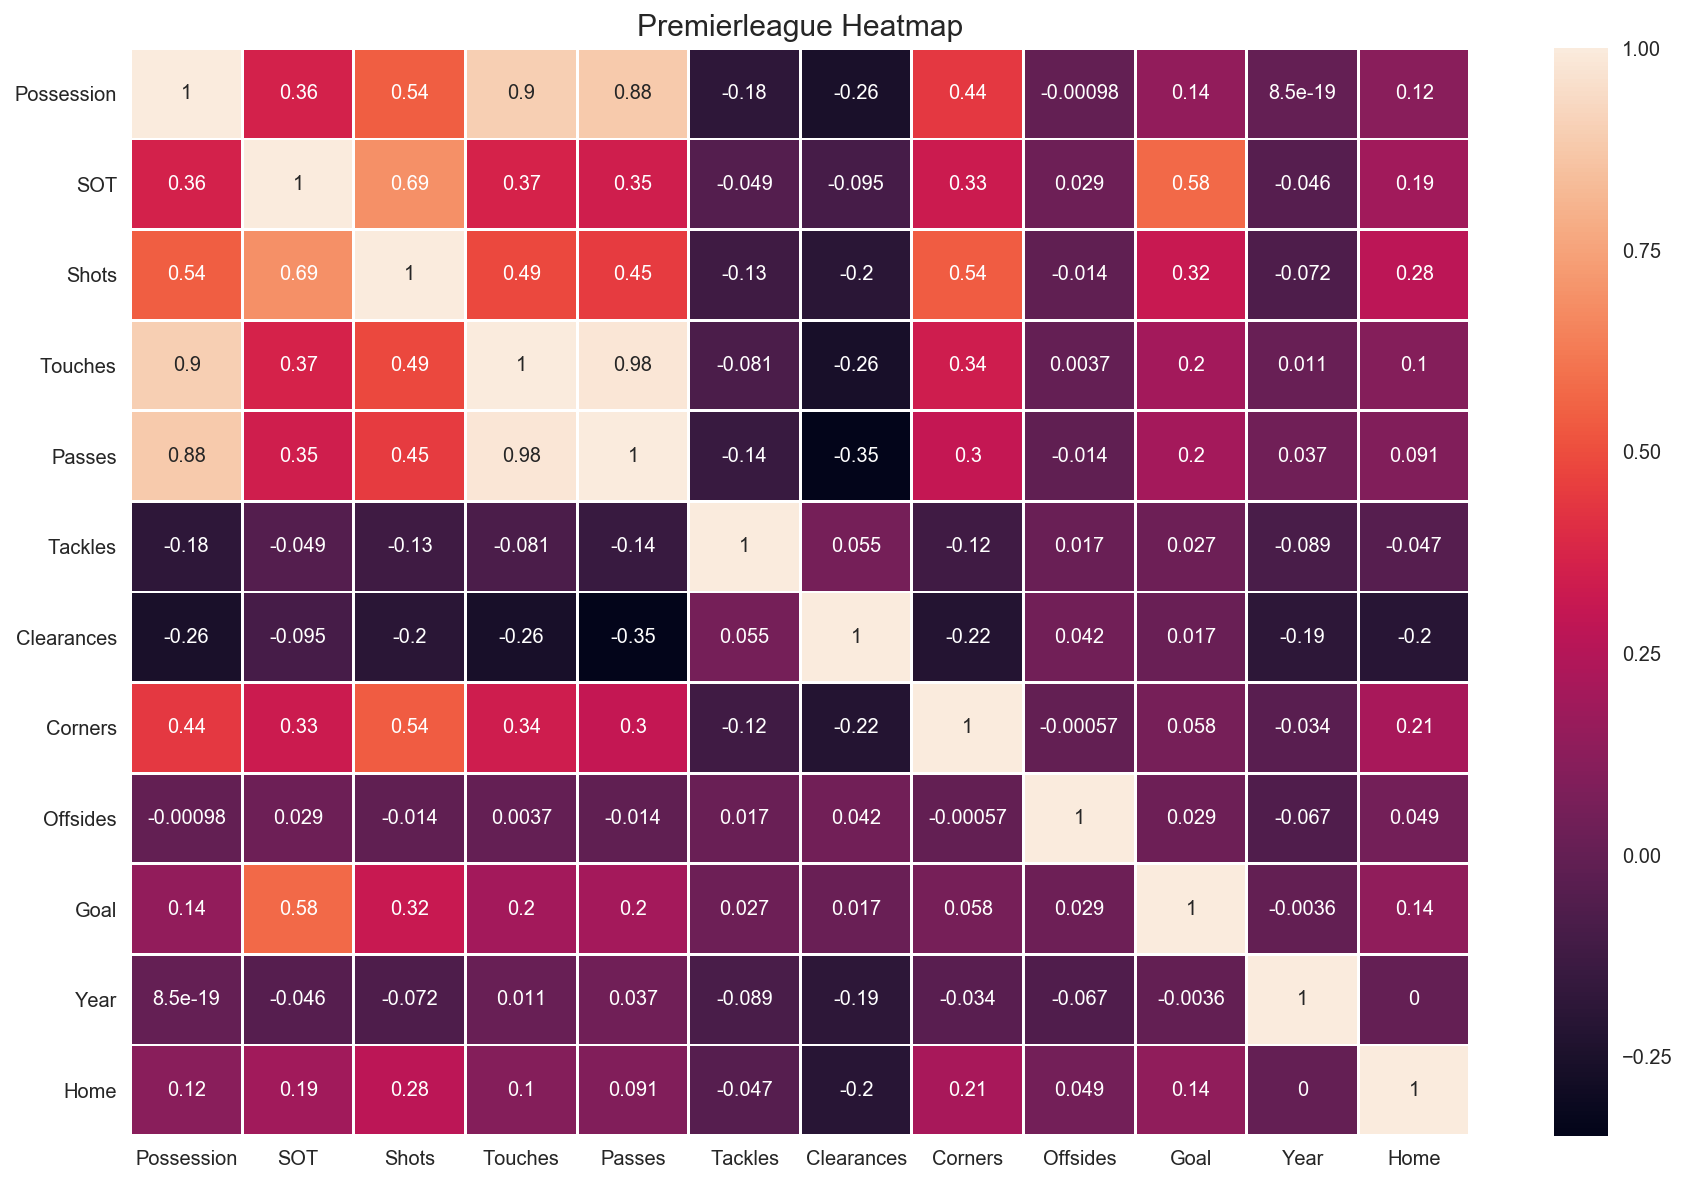

In [11]:
# correlation
correlation = train.drop(['Team', 'Result'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation.corr(), annot=True, linewidths=1)
plt.title('Premierleague Heatmap', fontsize = 15)
plt.show()

---

## 2. Feature Select

#### 2.1 VIF Factor

In [13]:
# VIF - 다중공선성
vif_train = train.drop(['Team', 'Result'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_train.values, i) for i in range(vif_train.shape[1])]
vif["features"] = vif_train.columns
vif

,VIF Factor,features
0,136.174014,Possession
1,10.935964,SOT
2,19.660793,Shots
3,1583.093997,Touches
4,732.883603,Passes
5,15.933275,Tackles
6,12.092899,Clearances
7,6.988084,Corners
8,2.705923,Offsides
9,3.579688,Goal


#### Note :
1. VIF Factor가 높은 column은 Possession, Touches, Passes, Year
2. 다중공선성을 제거하기 위해 높은 변수들 제거

In [71]:
# VIF - 다중공선성
vif_train = train.drop(['Team', 'Shots', 'Result', 'Possession', 'Touches', 'Year'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_train.values, i) for i in range(vif_train.shape[1])]
vif["features"] = vif_train.columns
vif

,VIF Factor,features
0,7.421722,SOT
1,11.695884,Passes
2,8.767251,Tackles
3,5.581759,Clearances
4,5.274209,Corners
5,2.623737,Offsides
6,3.429021,Goal
7,2.148569,Home


#### 2.2 Preprocessing

In [72]:
# Select columns
category = ['Home']
continuous = ['Passes', 'Tackles', 'Clearances', 'SOT', 'Corners', 'Offsides', 'Goal', ]

In [73]:
# make train/test data

train_cols, test_cols = [], []

# category
for cat in category:
    train_tok, test_tok = category_to_ohe(train[cat],test[cat])
    train_cols.append(train_tok)
    test_cols.append(test_tok)    

# continuous
for con in continuous:
    train_cols.append(train[con].values.reshape(len(train),1))
    test_cols.append(test[con].values.reshape(len(test),1))
 

In [74]:
# stack train/test data
X_train = np.hstack(tuple(each for each in train_cols))
X_test = np.hstack(tuple(each for each in test_cols))
y_train = train['Result']

In [75]:
# check X_train shape
X_train

array([[  1, 703,  16, ...,   7,   2,   0],
       [  0, 294,  28, ...,   0,   1,   0],
       [  1, 568,  11, ...,   6,   2,   5],
       ...,
       [  0, 316,  18, ...,   4,   0,   1],
       [  1, 297,  20, ...,   4,   0,   0],
       [  0, 620,  19, ...,   5,   2,   5]])

In [76]:
# check X_test shape
X_test

array([[  1, 632,  23, ...,   9,   5,   4],
       [  0, 263,  17, ...,   4,   3,   3],
       [  1, 213,  10, ...,   3,   6,   0],
       ...,
       [  0, 255,  22, ...,   4,   4,   4],
       [  1, 478,  11, ...,   6,   4,   3],
       [  0, 364,  10, ...,   6,   1,   1]])

In [77]:
# check Y_train shape
y_train.tail()

3795    1
3796    1
3797    0
3798    0
3799    1
Name: Result, dtype: int64

---

## 3. Modeling

#### 3.1 조건부 확률기반 생성 모형

In [78]:
# LDA (linear discriminant analysis)
model = LinearDiscriminantAnalysis(n_components=3, solver="svd", 
        store_covariance=True).fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# comparison
y_true = test['Result']
y_pred = []

for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

target_names = ['Lose', 'Win', 'Draw']
print('LDA Confusion Matrix : \n\n',confusion_matrix(y_true, y_pred))
print('\n\nLDA Classification Report : \n\n', classification_report(y_true, y_pred, target_names=target_names))

LDA Confusion Matrix : 

 [[260  17   4]
 [ 47 210  24]
 [138  44  16]]


LDA Classification Report : 

              precision    recall  f1-score   support

       Lose       0.58      0.93      0.72       281
        Win       0.77      0.75      0.76       281
       Draw       0.36      0.08      0.13       198

avg / total       0.60      0.64      0.58       760



In [79]:
# QDA (Quadratic Discriminanat Analysis)
model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# comparison
y_true = test['Result']
y_pred = []

for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

target_names = ['Lose', 'Win', 'Draw']
print('QDA Confusion Matrix : \n\n',confusion_matrix(y_true, y_pred))
print('\n\nQDA Classification Report : \n\n', classification_report(y_true, y_pred, target_names=target_names))

QDA Confusion Matrix : 

 [[252  21   8]
 [ 48 214  19]
 [132  40  26]]


QDA Classification Report : 

              precision    recall  f1-score   support

       Lose       0.58      0.90      0.71       281
        Win       0.78      0.76      0.77       281
       Draw       0.49      0.13      0.21       198

avg / total       0.63      0.65      0.60       760



In [80]:
# Naive bayesian - Multinomial
model = MultinomialNB().fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# comparison
y_true = test['Result']
y_pred = []

for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

target_names = ['Lose', 'Win', 'Draw']
print('NB Confusion Matrix : \n\n',confusion_matrix(y_true, y_pred))
print('\n\nNB Classification Report : \n\n', classification_report(y_true, y_pred, target_names=target_names))

NB Confusion Matrix : 

 [[193  32  56]
 [ 61 177  43]
 [ 97  51  50]]


NB Classification Report : 

              precision    recall  f1-score   support

       Lose       0.55      0.69      0.61       281
        Win       0.68      0.63      0.65       281
       Draw       0.34      0.25      0.29       198

avg / total       0.54      0.55      0.54       760



#### 3.2 모형결합 (Ensemble)

In [81]:
# 랜덤포레스트 (RandomForest)
clf = RandomForestClassifier(n_estimators=1000, max_depth=8, min_samples_split = 10, criterion = 'entropy')
model = clf.fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# comparison
y_true = test['Result']
y_pred = []

for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

target_names = ['Lose', 'Win', 'Draw']
print('RandomForest Confusion Matrix : \n\n',confusion_matrix(y_true, y_pred))
print('\n\nRandomForest Classification Report : \n\n', classification_report(y_true, y_pred, target_names=target_names))

RandomForest Confusion Matrix : 

 [[256  23   2]
 [ 43 234   4]
 [136  56   6]]


RandomForest Classification Report : 

              precision    recall  f1-score   support

       Lose       0.59      0.91      0.72       281
        Win       0.75      0.83      0.79       281
       Draw       0.50      0.03      0.06       198

avg / total       0.62      0.65      0.57       760



In [82]:
# 에이다 부스트 (Ada Boost)
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, random_state=0), 
                               algorithm="SAMME", n_estimators=300).fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# comparison
y_true = test['Result']
y_pred = []

for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

target_names = ['Lose', 'Win', 'Draw']
print('AdaBoost Confusion Matrix : \n\n',confusion_matrix(y_true, y_pred))
print('\n\nAdaBoost Classification Report : \n\n', classification_report(y_true, y_pred, target_names=target_names))

AdaBoost Confusion Matrix : 

 [[211  38  32]
 [ 26 218  37]
 [ 94  63  41]]


AdaBoost Classification Report : 

              precision    recall  f1-score   support

       Lose       0.64      0.75      0.69       281
        Win       0.68      0.78      0.73       281
       Draw       0.37      0.21      0.27       198

avg / total       0.59      0.62      0.59       760



In [83]:
# 그레디언트 부스트 (Gradient Boost)
model = GradientBoostingClassifier(n_estimators=1000, max_depth=5, random_state=0).fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# comparison
y_true = test['Result']
y_pred = []

for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

target_names = ['Lose', 'Win', 'Draw']
print('GradientBoost Confusion Matrix : \n\n',confusion_matrix(y_true, y_pred))
print('\n\nGradientBoost Classification Report : \n\n', classification_report(y_true, y_pred, target_names=target_names))

GradientBoost Confusion Matrix : 

 [[202  29  50]
 [ 31 210  40]
 [104  52  42]]


GradientBoost Classification Report : 

              precision    recall  f1-score   support

       Lose       0.60      0.72      0.65       281
        Win       0.72      0.75      0.73       281
       Draw       0.32      0.21      0.25       198

avg / total       0.57      0.60      0.58       760



In [84]:
# XG boost
model = xgboost.XGBClassifier(n_estimators=500, max_depth=2).fit(X_train, y_train)
predict_proba = model.predict_proba(X_test)

# comparison
y_true = test['Result']
y_pred = []

for i in range(760) :
    y_pred.append(np.argmax(predict_proba[i]))

target_names = ['Lose', 'Win', 'Draw']
print('XGboost Confusion Matrix : \n\n',confusion_matrix(y_true, y_pred))
print('\n\nXGboost Classification Report : \n\n', classification_report(y_true, y_pred, target_names=target_names))

XGboost Confusion Matrix : 

 [[247  27   7]
 [ 35 233  13]
 [115  58  25]]


XGboost Classification Report : 

              precision    recall  f1-score   support

       Lose       0.62      0.88      0.73       281
        Win       0.73      0.83      0.78       281
       Draw       0.56      0.13      0.21       198

avg / total       0.65      0.66      0.61       760



#### Note :

- 성능이 제일 좋은 모델은 XG Boost
- Precision(0.65), Recall(0.66), F1-score(0.61), Support(760)

---

## 4. Evaluation

#### 4.1 ROC curve

In [85]:
# make binarize
y0 = []
for i in range(len(y_true)):
    if y_true[i] == 0 :
        y0.append(1) # y가 0이면 1
    else:
        y0.append(0) # y가 0이 아니면 0
    
y1 = []
for i in range(len(y_true)):
    if y_true[i] == 1 :
        y1.append(1) # y가 1이면 1
    else:
        y1.append(0) # y가 1이 아니면 0
        
y2 = []
for i in range(len(y_true)):
    if y_true[i] == 2 :
        y2.append(1) # y가 2이면 1
    else:
        y2.append(0) # y가 2가 아니면 0   

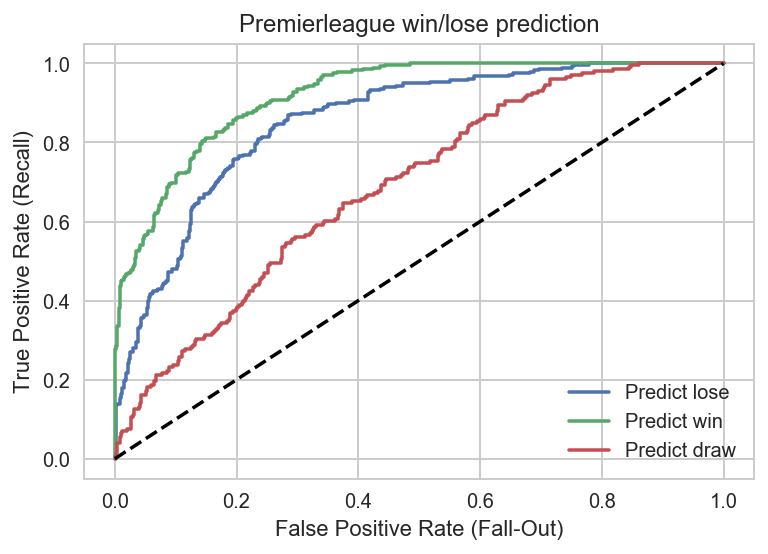

In [86]:
# make model
fpr1, tpr1, thresholds1 = roc_curve(y0, model.predict_proba(X_test)[:, 0])
fpr2, tpr2, thresholds2 = roc_curve(y1, model.predict_proba(X_test)[:, 1])
fpr3, tpr3, thresholds3 = roc_curve(y2, model.predict_proba(X_test)[:, 2])

# ROC curve
plt.plot(fpr1, tpr1, label= 'Predict lose')
plt.plot(fpr2, tpr2, label= 'Predict win')
plt.plot(fpr3, tpr3, label= 'Predict draw')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Premierleague win/lose prediction')
plt.show()

#### 4.2 AUC

In [87]:
# AUC score
auc(fpr1, tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)

(0.8555041270737523, 0.9194273360128976, 0.6882256731011179)